In [231]:
import numpy as np
import pandas as pd
import os
import glob
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# import tensorflow as tf

from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split


import os
import datetime
from zoneinfo import ZoneInfo
import pandas as pd
import numpy as np
import PIL
#import ffmpeg
from PIL import Image
from PIL import ImageOps
# from PIL import Resampling
from matplotlib import cm

In [1047]:
!dir

 Volume in drive C is OSDisk
 Volume Serial Number is F8D6-0D86

 Directory of C:\Users\Jkb83\Work Folders\Desktop\pressure_mat_camera

13/10/2024  14:56    <DIR>          .
13/10/2024  14:56    <DIR>          ..
15/05/2024  11:31                66 .gitattributes
13/09/2024  12:01             3,269 .gitignore
06/10/2024  14:20    <DIR>          .ipynb_checkpoints
01/10/2024  11:54    <DIR>          data
26/09/2024  08:21           451,142 decision-tree-classifer.ipynb
13/10/2024  14:56            76,101 find_blank_mat_frames.ipynb
16/09/2024  09:08            68,365 find_odd.ipynb
26/09/2024  12:40            15,397 Jonathan_test_26-9.ipynb
15/05/2024  11:31             1,092 LICENSE
15/05/2024  14:21             2,864 make_directories.ipynb
12/06/2024  13:57           788,443 Marion_Fall12.csv
13/09/2024  12:01           393,898 mat_camera_align.ipynb
26/09/2024  08:24           347,305 mat_camera_merge.ipynb
13/10/2024  14:44    <DIR>          MB_transformed_data_ADLs
08/10/2024  13:

In [1048]:
def mat_date_reader(d):
    try:
        return datetime.datetime.strptime(d, '%Y-%m-%dT%H:%M:%S.%f%z')
    except ValueError:
        return datetime.datetime.strptime(d, '%Y-%m-%dT%H:%M:%S%z')

In [ ]:
Utility function to parse the datetime information in the mat data.

Read one particular data file.

In [1358]:
mframe = pd.read_csv('data/mat_data/Marion/ADL/Dataset MB1 11_06 PMADL/81/81.csv', 
                     converters={'Timestamp': mat_date_reader},
                    index_col='Frame')
mframe.dtypes

Timestamp           datetime64[ns, UTC+01:00]
Range Min (mmHg)                        int64
Range Max (mmHg)                        int64
0                                       int64
1                                       int64
                              ...            
1723                                    int64
1724                                    int64
1725                                    int64
1726                                    int64
1727                                    int64
Length: 1731, dtype: object

In [1359]:
mframe

,Timestamp,Range Min (mmHg),Range Max (mmHg),0,1,2,3,4,5,6,...,1718,1719,1720,1721,1722,1723,1724,1725,1726,1727
Frame,,,,,,,,,,,,,,,,,,,,,
1,2024-10-14 12:45:41.595000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2024-10-14 12:45:41.627000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2024-10-14 12:45:41.660000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2024-10-14 12:45:41.692000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2024-10-14 12:45:41.725000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1577,2024-10-14 12:46:32.651000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1578,2024-10-14 12:46:32.684000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1579,2024-10-14 12:46:32.716000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1360]:
mframe_trimmed = mframe.drop(['Timestamp', 'Range Min (mmHg)', 'Range Max (mmHg)'], axis='columns')
mframe_trimmed

,0,1,2,3,4,5,6,7,8,9,...,1718,1719,1720,1721,1722,1723,1724,1725,1726,1727
Frame,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1577,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1578,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1579,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: ylabel='Frequency'>

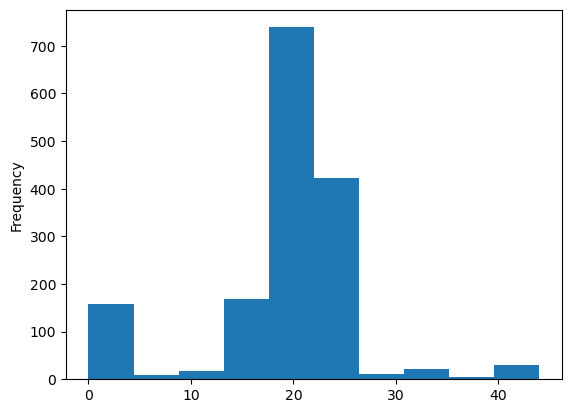

In [1361]:
mframe_trimmed.astype('bool').sum(axis='columns').plot.hist()

In [1362]:
PIXEL_VALUE_GREATER_THAN = 10
mframe_trimmed.astype('bool').sum(axis='columns') > PIXEL_VALUE_GREATER_THAN

Frame
1        True
2        True
3        True
4        True
5        True
        ...  
1577    False
1578    False
1579    False
1580    False
1581    False
Length: 1581, dtype: bool

In [1363]:

mframe_trimmed.loc[150:170].astype('bool').sum(axis='columns')

Frame
150    20
151    20
152    20
153    20
154    20
155    21
156    21
157    25
158    27
159    28
160    28
161    27
162    26
163    26
164    24
165    24
166    24
167    24
168    24
169    24
170    23
dtype: int64

In [1378]:
MINIMUM_PIXELS = 1
MAXIMUM_PIXELS = 45
at_least_some_pixels = mframe_trimmed.astype('bool').sum(axis='columns') > MINIMUM_PIXELS
not_too_many_pixels = mframe_trimmed.astype('bool').sum(axis='columns') < MAXIMUM_PIXELS
mframe_with_pixels = mframe[at_least_some_pixels & not_too_many_pixels]
mframe_with_pixels

,Timestamp,Range Min (mmHg),Range Max (mmHg),0,1,2,3,4,5,6,...,1718,1719,1720,1721,1722,1723,1724,1725,1726,1727
Frame,,,,,,,,,,,,,,,,,,,,,
1,2024-10-14 12:45:41.595000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2024-10-14 12:45:41.627000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2024-10-14 12:45:41.660000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2024-10-14 12:45:41.692000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2024-10-14 12:45:41.725000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421,2024-10-14 12:46:27.595000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1422,2024-10-14 12:46:27.628000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1423,2024-10-14 12:46:27.660000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1328]:
mn = mframe_with_pixels.index.min()
mx = mframe_with_pixels.index.max()
mn, mx

(1, 884)

In [1329]:
mn = mframe[mframe_trimmed.astype('bool').sum(axis='columns') > 5].index.min()
mx = mframe[mframe_trimmed.astype('bool').sum(axis='columns') > 5].index.max()
mn, mx

(1, 884)

In [1330]:
mframe.loc[mn:mx]

,Timestamp,Range Min (mmHg),Range Max (mmHg),0,1,2,3,4,5,6,...,1718,1719,1720,1721,1722,1723,1724,1725,1726,1727
Frame,,,,,,,,,,,,,,,,,,,,,
1,2024-10-14 12:43:00.968000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2024-10-14 12:43:01.001000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2024-10-14 12:43:01.033000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2024-10-14 12:43:01.065000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2024-10-14 12:43:01.098000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,2024-10-14 12:43:46.408000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
881,2024-10-14 12:43:46.440000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
882,2024-10-14 12:43:46.473000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1331]:
mframe.loc[mn:mx].to_csv('MB_transformed_data_ADLs/PMADL79_mframe.csv')
